## Gradient Descent

The general way machine learning algorithms work is by optimizing a cost function.

Gradient descent is a first-order iterative optimization algorithm. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or of the approximate gradient) of the function at the current point. If instead one takes steps proportional to the positive of the gradient, one approaches a local maximum of that function; the procedure is then known as gradient ascent.

Gradient descent|ascent is an algorithm for solving optimization problems. In gradient descent, I would like to find the solution which minimizes the cost function. 

In statistics, a likelihood function (often simply the likelihood) is a function of the parameters of a statistical 
model given data. Likelihood functions play a key role in statistical inference, especially methods of estimating a parameter from a set of statistics. In informal contexts, "likelihood" is often used as a synonym for "probability." In statistics, a distinction is made depending on the roles of outcomes vs. parameters. Probability is used before data are available to describe possible future outcomes given a fixed value for the parameter (or parameter vector). Likelihood is used after data are available to describe a function of a parameter (or parameter vector) for a given outcome.


**$\alpha $** alpha is a parameter in our algorithm, generally called the step size or learning rate.

If alpha is too small, it will take a really long time to converge.

If alpha is too large, we'll actually end up overshooting the optimal value and keep getting further and further away. So in this case it will diverge.

The cost function $ J(\theta)$ is an important concept in learning, as it is a measure of how far away a particular solution is from an optimal solution to the problem to be solved. Learning algorithms search through the solution space to find a function that has the smallest possible cost.



---
**Logistic function / Log likelihood**


The logistic regression can be understood simply as finding the $\beta$ parameters that best fit:

${\displaystyle y={\begin{cases}1&\beta _{0}+\beta _{1}x+\epsilon >0\\0&{\beta _{0}+\beta _{1}x+\epsilon < 0}\end{cases}}}$

where $\epsilon $ is an error distributed by the standard logistic distribution. 

The associated latent variable is $ y'=\beta _{0}+\beta _{1}x+\epsilon.$ The error term $\epsilon $ is not observed, and so the $y\prime $ is also an unobservable, hence termed "latent". (The observed data are values of $y$ and $x$) Unlike ordinary regression, however, the $\beta$ parameters cannot be expressed by any direct formula of the $y$ and $x$ values in the observed data. Instead they are to be found by an iterative search process, usually implemented by a software program, that finds the maximum of a complicated "likelihood expression" that is a function of all of the observed $y$ and $x $ values. The estimation approach is explained below.



 $   Logit^{-1}(Z) = g(Z)  =  {\frac {e^{Z}}{e^{Z}+1}} = {\frac {1}{1+e^{-Z}}}$

Let us assume that $Z$ is a linear function of a single explanatory variable $ x $(the case where $Z$ is a linear combination of multiple explanatory variables is treated similarly). We can then express $Z$ as follows:

 $ Z =\beta _{0}+\beta _{1}x := \theta^T x^i$  ..(Vectorization)

Note that $g(Z)$ is interpreted as the probability of the dependent variable equaling a "success" or "case" rather than a failure or non-case. It's clear that the response variables $ Y_{i}$ are not identically distributed: $P(Y_{i}=1\mid X)$ differs from one data point $ X_{i}$ to another, though they are independent given design matrix ${X}$ and shared with parameters $\theta$

$   g(Z)= h_{\theta}(x) ={\frac {1}{1+e^{-{\boldsymbol {\theta^T }}\cdot \mathbf {X} _{i}}}}$


Definition of the inverse of the logistic function
We can now define the inverse of the logistic function, $f$, the logit (log odds):

  $  f(g(Z))=\ln \left({\frac {g(Z)}{1-g(Z)}}\right)=\beta _{0}+\beta _{1}x:= \theta^T x^i ,
$

and equivalently, after exponentiating both sides:

 $   {\frac {g(Z)}{1-g(Z)}}=e^{\beta _{0}+\beta _{1}x}:= e^{\theta^T x^i}
$



In [3]:
from __future__ import division

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

import math
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%autoreload 2
%matplotlib inline
plt.style.use('ggplot')

In [4]:
X, y = make_classification(n_samples=100, 
                           n_features=2, 
                           n_informative=2, 
                           n_redundant=0, 
                           n_classes=2, 
                           random_state=0)

In [5]:
y[:5]

array([0, 0, 0, 1, 1])

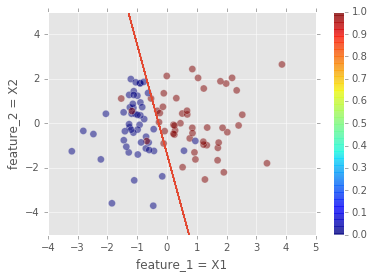

In [160]:
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, s=50) # feature_1 = X[:,0], feature_2 = X[:,1]
plt.xlabel('feature_1 = X1')
plt.ylabel('feature_2 = X2')
plt.colorbar()

# eyeline = np.linspace(-2, 2)
# plt.plot(eyeline, -4*eyeline - 1.8)


plt.plot(X[:,0], -X[:,0]*b1/b2-b0/b2)
plt.ylim(-5,5)
plt.legend()
plt.show()

---
    |  x1 |  x2 |   y |
    | --- | --- | --- |
    |   0 |   1 |   1 |
    |   2 |   2 |   0 |


In [7]:
y0 = 1
y1 = 0

# Xj,i column,row

x1_0 = 0
x1_1 = 2

x2_0 = 1
x2_1 = 2

---
Hypothesis / likelihood

** The "logistic" function of any number $\alpha$ is given by the inverse-logit: **


from linear regression := $h_{\theta}(x):=\theta_0+\theta_1 x^i_1+\dots+\theta_p x^i_p := \theta^T x^i  (Vectorization) $

$   h_{\theta}(x)=g(Z)=g(\theta^{T}x)={\frac {1}{1+e^{-{\boldsymbol {\theta^T }}\cdot \mathbf {X} _{i}}}}$


In [8]:
h0 = 1. / (1. + np.exp(-1*x1_0 -1*x2_0))

In [9]:
print 'h(0,1):', h0

h(0,1): 0.73105857863


In [10]:
h1 = 1. / (1. + np.exp(-1*x1_1 -1*x2_1))

In [11]:
print 'h(2,2):', h1

h(2,2): 0.982013790038


---
log_likelihood


** Cost function for Logistic Regression**


$ J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i}))$

In [12]:
cost = y0*np.log(h0)+(1-y0)*np.log(1-h0) + y1*np.log(h1) + (1-y1)*np.log(1-h1)

In [13]:
print 'cost:', cost

cost: -4.33141161544


---
Gradient for multiple features $n >= 1$

**Gradient of the cost function**

$\frac{\partial}{\partial\theta_{j}}J(\theta) =-\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{i})-y^i)x_j^i$

In [14]:
# gradient feature 1
gx1 = (y0-h0)*x1_0 + (y1-h1)*x1_1

In [15]:
print 'Gradient descend:', gx1

Gradient descend: -1.96402758008


In [16]:
# gradient feature 2
gx2 = (y0-h0)*x2_0 + (y1-h1)*x2_1

In [17]:
print 'Gradient descend:', gx2

Gradient descend: -1.69508615871


In [18]:
x_t = np.transpose(np.array([[0, 1],[2, 2]]))
x_ = np.array([[0, 1],[2, 2]])
y_ = np.array([1, 0])

B_t = np.array([[1,1]])
coeffs = np.array([1,1])

---
Function

**Logistic function / sigmoid function**

$h_\theta(x^i)=\frac{1}{1+e^{-\theta^T x^i} }$

In [53]:
# with x --> NOT transposed
def h(X, coeffs):
    return 1. / (1. + np.exp(-np.dot(X, coeffs.reshape(len(coeffs), 1))))

In [74]:
hazme = h(x_, coeffs).T # row vector

In [76]:
hazme[0]

array([ 0.73105858,  0.98201379])

In [55]:
def predict(X, coeffs):
    return h(X, coeffs).round()

In [57]:
#predict(X, coeffs)

---
maximize the log likelihood + lasso ridge

**Regularized cost function**


The second sum, $\sum _{j=1}^{n} |\theta _{j}|_{}^{2}$ **means to explicitly exclude** the bias term, $\theta _{0}$. I.e. the $\theta$ vector is indexed from $0$ to $n$ (holding $n+1$ values, $\theta _{0}$ through $\theta _{n}$), and this sum explicitly skips $\theta _{0}$, by running from $1$ to $n$, skipping $ 0$.



$ J(\theta)= -\frac{1}{m}\sum_{i=1}^{m}[y^{i}\log(h_\theta(x^{i}))+(1-y^{i})\log(1-h_\theta(x^{i}))] +  \frac{\lambda}{2m}\sum _{j=1}^{n} |\theta _{j}|_{}^{2} $ 

In [1]:
def log_likelihood(X, y, coeffs, lbda=0):
    lreg =  np.sum(coeffs**2)
    hx = h(X, coeffs).T
    return np.sum(y * np.log(hx[0]) + (1 - y) * np.log(1-hx[0]) + lbda*lreg)

In [80]:
log_likelihood(x_, y_, coeffs)

-4.3314116154360329

---
** Gradient function**

$\frac{\partial}{\partial\theta_{j}}J(\theta) =\frac{1}{m}\sum_{i=1}^{m}(y^i - h_\theta(x^{i}))x_j^i + \frac{\lambda}{m}\theta _{j}$

In [126]:
def log_likelihood_gradient(X, y, coeffs, l = 0):
    dlreg = 2*l*coeffs.T
    y = y.reshape(len(y), 1) # column vector
    dif = (y - h(X, coeffs)).T

    return np.squeeze(dif.dot(X)) + dlreg

In [127]:
log_likelihood_gradient(x_, y_, coeffs, 0)

array([-1.96402758, -1.69508616])

---

In [132]:
import Gradient_functions as gf

In [149]:
gf.hypothesis(x_, coeffs)

array([[ 0.73105858],
       [ 0.98201379]])

In [150]:
gf.predict(x_, coeffs)

array([[ 1.],
       [ 1.]])

In [151]:
gf.log_likelihood(x_, y_, coeffs, 0)

-4.3314116154360329

In [152]:
gf.log_likelihood_gradient(x_, y_, coeffs)

array([-1.96402758, -1.69508616])

---

In [153]:
from Gradient_functions import log_likelihood, log_likelihood_gradient, predict

In [154]:
from Gradient_class import GradientAscent

In [162]:
# __init__(self, cost, gradient, predict_func, fit_intercept=True, scale=False)
gd = GradientAscent(gf.log_likelihood, gf.log_likelihood_gradient, gf.predict)

In [163]:
gd.run(X, y)


Cost fn: -69.0695587423
Cost fn: -31.4208773287
Cost fn: -28.4232612311
Cost fn: -27.3384487824
Cost fn: -26.8190714642
Cost fn: -26.5364578939
Cost fn: -26.3707266231
Cost fn: -26.2686576384
Cost fn: -26.2036036471
Cost fn: -26.1610880182


In [164]:
predictions = gd.predict(X)

In [165]:
gd.coeffs

array([ 0.87974112,  3.12340628,  0.63915276])

In [166]:
 b0, b1, b2 = gd.coeffs

---


In [167]:
X_, y__ = make_classification(n_samples=100, n_features=2,
                         n_informative=2, n_redundant=0,
                         n_classes=2, random_state=0)

In [168]:
gd_ = GradientAscent(gf.log_likelihood, gf.log_likelihood_gradient, gf.predict, fit_intercept=False)
gd_.run(X_,y__)
print "coeffs:", gd_.coeffs


Cost fn: -69.0695587423
Cost fn: -32.2414101543
Cost fn: -30.0862515296
Cost fn: -29.502778665
Cost fn: -29.2862916394
Cost fn: -29.1938722996
Cost fn: -29.1512511566
Cost fn: -29.1306466817
Cost fn: -29.1203766665
Cost fn: -29.1151513267
coeffs: [ 2.66759941  0.59703473]


---
Logistic regression


In [169]:
model = LogisticRegression(fit_intercept=False)
model.fit(X_,y__)
model.coef_

array([[ 2.19963064,  0.42742225]])

In [170]:
model = LogisticRegression(fit_intercept=False)
model.fit(np.insert(X_,0 , 1, axis=1), y__)
model.coef_

array([[ 0.58286607,  2.44080989,  0.45519517]])


---
**As a generalized linear model**


The particular model used by logistic regression, which distinguishes it from standard linear regression and from other types of regression analysis used for binary-valued outcomes, is the way the probability of a particular outcome is linked to the linear predictor function:

  $ \operatorname {logit} (\mathbb {E} [Y_{i}\mid x_{1,i},\ldots ,x_{m,i}])=\operatorname {logit} (p_{i})=\ln \left({\frac {p_{i}}{1-p_{i}}}\right)=\beta _{0}+\beta _{1}x_{1,i}+\cdots +\beta _{m}x_{m,i}
$

Written using the more compact notation described above, this is:

 $  \operatorname {logit} (\mathbb {E} [Y_{i}\mid \mathbf {X} _{i}])=\operatorname {logit} (p_{i})=\ln \left({\frac {p_{i}}{1-p_{i}}}\right)={\boldsymbol {\beta }}\cdot \mathbf {X} _{i}
 $
This


An equivalent formula uses the inverse of the logit function, which is the logistic function, i.e.:

  $   {E} [Y_{i}\mid \mathbf {X} _{i}]=p_{i}=\operatorname {logit} ^{-1}({\boldsymbol {\beta }}\cdot \mathbf {X} _{i})={\frac {1}{1+e^{-{\boldsymbol {\beta }}\cdot \mathbf {X} _{i}}}}$

$y_i = \beta_1 x_{i1} + \cdots + \beta_p x_{ip} + \varepsilon_i =\mathbf{X}\cdot\boldsymbol\beta + \varepsilon_i = \mathbf{x}^{\rm T}_i\boldsymbol\beta + \varepsilon_i,
 \qquad i = 1, \ldots, n,$
 
 where:
 
 $\mathbf{y} = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{pmatrix}, \quad$
 
 $\mathbf{X} = \begin{pmatrix} \mathbf{x}^{\rm T}_1 \\ \mathbf{x}^{\rm T}_2 \\ \vdots \\ \mathbf{x}^{\rm T}_n \end{pmatrix}
 = \begin{pmatrix} x_{11} & \cdots & x_{1p} \\
 x_{21} & \cdots & x_{2p} \\
 \vdots & \ddots & \vdots \\
 x_{n1} & \cdots & x_{np}
 \end{pmatrix}, $
 
 
 $\boldsymbol\beta = \begin{pmatrix} \beta_1 \\ \beta_2 \\ \vdots \\ \beta_p \end{pmatrix}, \quad
 \boldsymbol\varepsilon = \begin{pmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \vdots \\ \varepsilon_n \end{pmatrix}.$